In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\us953\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# reading test csv file.
test_df = pd.read_csv('Data_Test.csv')
final_predicted_data = test_df.copy()

In [3]:
# reading train csv file
df = pd.read_csv('Data_Train.csv')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


# Exploratory Data Analysis

In [4]:
# getting size of data set.
df.shape

(12690, 9)

##### This dataset contains 12690 rows and 9 columns, out of which one column represents the target variable and the remaining eleven columns are independent variables.

In [5]:
# list of columns.
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [6]:
#Investigating the entire dataset first
df.duplicated().sum()

25

In [7]:
df= df.drop_duplicates()

In [8]:
# dropping unused columns.
df.drop(['RESTAURANT_ID', 'TIME','LOCALITY', 'CITY'], axis=1, inplace=True)
test_df.drop(['RESTAURANT_ID', 'TIME', 'LOCALITY', 'CITY'], axis=1, inplace=True)

In [9]:
df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [10]:
# getting NEW value, need to convert it.
df[df['RATING'] == 'NEW'] 

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
62,QUICK BITES,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,NEW,NaN,200
69,NaN,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,NEW,NaN,200
111,CASUAL DINING,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,NEW,NaN,800
117,QUICK BITES,"North Indian, Chinese",11am – 11pm (Mon-Sun),New Delhi,Dwarka,NEW,NaN,500
120,QUICK BITES,"North Indian, South Indian","7:30am – 9:30pm (Mon-Sat),Closed (Sun)",Bangalore-560066,Whitefield,NEW,NaN,150
...,...,...,...,...,...,...,...,...
12602,QUICK BITES,"Rolls, North Indian, Biryani",12noon – 12midnight (Mon-Sun),Mumbai,Mahakali,NEW,NaN,200
12613,CASUAL DINING,"Asian, Thai, Sushi, Healthy Food",12noon – 11pm (Mon-Sun),Gurgaon,DLF Phase 4,NEW,NaN,950
12630,CASUAL DINING,"Tex-Mex, Italian, Coffee",8am – 10:30pm (Mon-Sun),Gurgaon,Golf Course Road,NEW,NaN,1200
12658,NaN,"Kerala, South Indian",11am – 5pm (Mon-Sun),Kochi,Chittoor Road,NEW,NaN,400


In [11]:
# Removing text from the 'votes' column
df['VOTES'] = df['VOTES'].str.extract('(\d+)').astype(float)
test_df['VOTES'] = test_df['VOTES'].str.extract('(\d+)').astype(float)

In [12]:
# Replacing New with NaN.
df.replace('NEW', np.NaN, inplace=True)
test_df.replace('NEW', np.NaN, inplace=True)

In [13]:
# checking null values.
df.isna().sum()

TITLE       1000
CUISINES       0
TIME           0
CITY         112
LOCALITY      98
RATING       706
VOTES       1200
COST           0
dtype: int64

In [14]:
# Checking the types.
df.dtypes

TITLE        object
CUISINES     object
TIME         object
CITY         object
LOCALITY     object
RATING       object
VOTES       float64
COST          int64
dtype: object

In [15]:
# sum of - values.
(df['RATING'] == '-').sum()

494

In [16]:
# Replacing the - from NaN
df['RATING'].replace('-', np.NAN, inplace=True)

In [17]:
# againg checking.
(df['RATING'] == '-').sum()

0

In [18]:
# checking NaN for all the columns.
df.isna().sum()

TITLE       1000
CUISINES       0
TIME           0
CITY         112
LOCALITY      98
RATING      1200
VOTES       1200
COST           0
dtype: int64

In [19]:
#  Fill NaN values with mode for each column that has NaN values
for col in df.columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode().iloc[0])

In [20]:
# removing all the null values.
df.isna().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

In [21]:
# getting first 100 rows.
df.head(100)

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300
...,...,...,...,...,...,...,...,...
95,CAFÉ,"Cafe, Healthy Food","12:30pm – 3:30pm, 6pm – 10:30pm (Mon-Sun)",Hyderabad,Lingampally,4.2,148.0,500
96,CASUAL DINING,"Fast Food, Mexican, North Indian, Chinese",11am – 11pm (Mon-Sun),Chennai,Nanganallur,3.8,221.0,700
97,CASUAL DINING,"North Indian, Iranian",12noon – 10:30pm (Mon-Sun),Bangalore,Church Street,3.9,228.0,950
98,QUICK BITES,"Biryani, Kebab","Closed (Mon),11am – 10:30pm (Tue-Sun)",Bangalore,Rajajinagar,3.8,302.0,400


<Axes: >

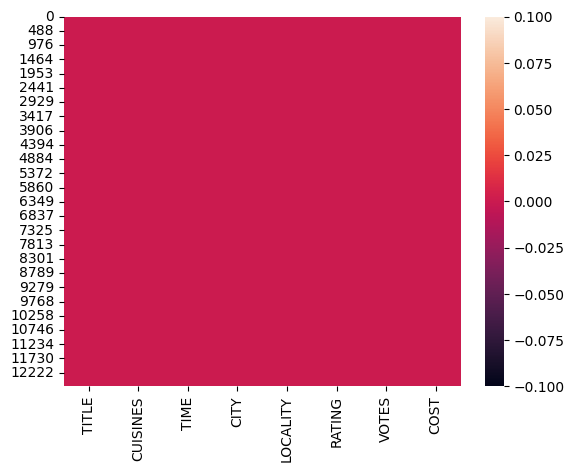

In [22]:
# Representation with heatmap.
sns.heatmap(df.isnull())

In [23]:
# Checking the types.
df.dtypes

TITLE        object
CUISINES     object
TIME         object
CITY         object
LOCALITY     object
RATING       object
VOTES       float64
COST          int64
dtype: object

In [24]:
# changing the type of RATING.
df['RATING'] = df['RATING'].astype(float)
# test_df['RATING'] = test_df['RATING'].astype(float)

In [25]:
# again Checking the types.
df.dtypes

TITLE        object
CUISINES     object
TIME         object
CITY         object
LOCALITY     object
RATING      float64
VOTES       float64
COST          int64
dtype: object

# Cleaning of the data is done.

In [26]:
# getting summary description of dataset.
df.describe()

,RATING,VOTES,COST
count,12665.000000,12665.000000,12665.000000
mean,3.796123,380.411607,655.400790
std,0.403185,809.716694,627.389831
min,2.000000,4.000000,20.000000
25%,3.600000,44.000000,300.000000
50%,3.900000,132.000000,500.000000
75%,4.000000,405.000000,800.000000
max,4.900000,41186.000000,14000.000000


#### Count indicates the number of non-null values present in each column. When the mean is greater than the median (50th percentile) in a column, it shows right skewness, indicating a positively skewed distribution. Conversely, when the mean is less than the median in a column, it shows left skewness, indicating a negatively skewed distribution. Thus, if some columns have means greater than their medians and others have means less than their medians, it suggests that the dataset contains both positively and negatively skewed distributions. Let's examine this step by step.
#### Also outliers are presents in this data set.

In [27]:
# We have noticed that in dataset the columns are in categorial type.
# Encoding categorial columns using OrdinalEncodes.

In [28]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))


# For testing Data.
for i in test_df.columns:
    if test_df[i].dtype == 'object':
        test_df[i] = OE.fit_transform(test_df[i].values.reshape(-1,1))

#### Checking outliers

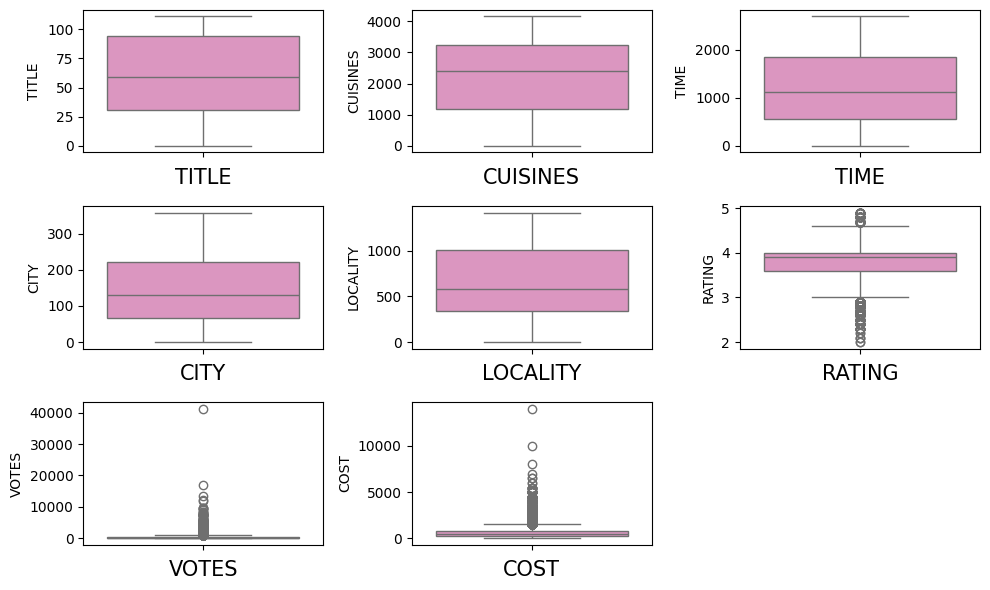

In [29]:
# Before removing outliers.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [30]:
# As we can see, there are outliers present in the dataset columns named "rating", "Votes" and "cost".

In [31]:
# Removing outliers
from scipy import stats

# Columns to handle outliers
columns_to_filter = ['RATING', 'COST', 'VOTES']

for col in columns_to_filter:
    # Calculate the Z-scores
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define a threshold
    threshold = 3

    # Remove outliers
    df = df[z_scores < threshold]

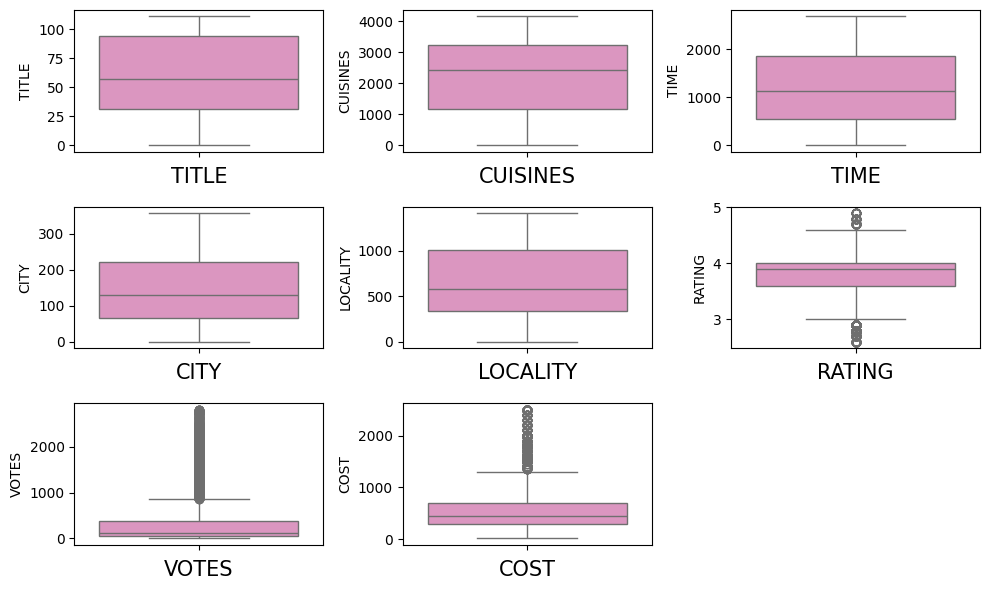

In [32]:
# After removing outliers.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [33]:
# After removing the possible outliers we can see total number are reduced.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12177 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12177 non-null  float64
 1   CUISINES  12177 non-null  float64
 2   TIME      12177 non-null  float64
 3   CITY      12177 non-null  float64
 4   LOCALITY  12177 non-null  float64
 5   RATING    12177 non-null  float64
 6   VOTES     12177 non-null  float64
 7   COST      12177 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 856.2 KB


In [34]:
# After removing the possible outliers we can see total number are reduced.
df.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000,12177.000000
mean,59.926829,2233.524267,1175.369796,141.889956,652.633982,3.789070,308.542416,591.332102
std,33.195757,1208.477507,758.786085,83.729109,399.661782,0.386021,445.051387,445.891734
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000,4.000000,20.000000
25%,31.000000,1181.000000,555.000000,67.000000,337.000000,3.600000,44.000000,300.000000
50%,57.000000,2428.000000,1123.000000,131.000000,582.000000,3.900000,123.000000,450.000000
75%,94.000000,3235.000000,1852.000000,222.000000,1009.000000,4.000000,374.000000,700.000000
max,111.000000,4154.000000,2688.000000,358.000000,1415.000000,4.900000,2811.000000,2500.000000


### checking skewness

In [35]:
df.skew()

TITLE      -0.094345
CUISINES   -0.213732
TIME        0.314530
CITY        0.281482
LOCALITY    0.350647
RATING     -0.510043
VOTES       2.607249
COST        1.821688
dtype: float64

In [36]:
# Skewness are present in this data.

### Checking visualization presentation

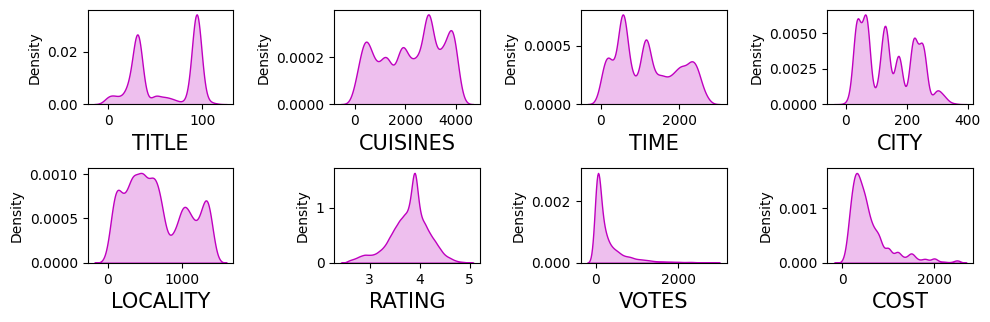

In [37]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

##### Removing Skewness

In [38]:
# Removing the skewness by using Cube root square.
df['VOTES'] = np.cbrt(df['VOTES'])

# Removing the skewness by using Cube root square.
df['COST'] = np.cbrt(df['COST'])

In [39]:
# After removing the skewness.
df.skew()

TITLE      -0.094345
CUISINES   -0.213732
TIME        0.314530
CITY        0.281482
LOCALITY    0.350647
RATING     -0.510043
VOTES       0.916684
COST        0.748053
dtype: float64

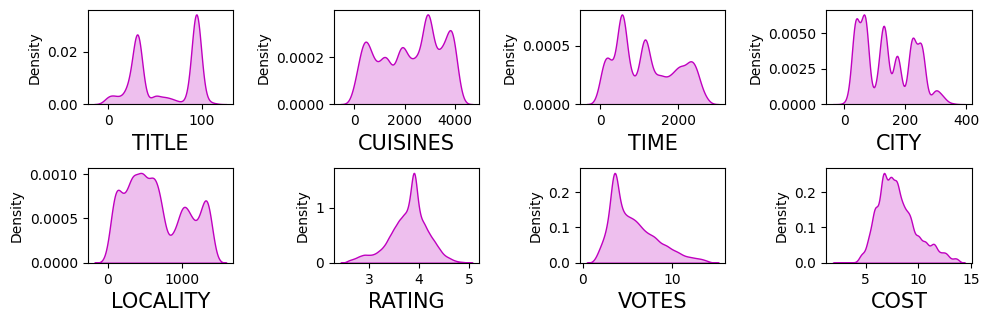

In [40]:
# Again checking.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in df.columns:
    if plotnumber <=8:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [41]:
# Now Correlation between target variable and independent variable.
cor = df.corr()
cor

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.247140,0.056843,-0.011680,0.027250,-0.146594,-0.207772,-0.409314
CUISINES,0.247140,1.000000,0.107142,0.024013,0.016470,-0.063536,-0.022913,-0.048165
TIME,0.056843,0.107142,1.000000,-0.011105,-0.007243,0.040070,-0.040853,-0.065048
CITY,-0.011680,0.024013,-0.011105,1.000000,0.051302,0.066132,0.100703,0.042002
LOCALITY,0.027250,0.016470,-0.007243,0.051302,1.000000,-0.026852,-0.037737,-0.017715
RATING,-0.146594,-0.063536,0.040070,0.066132,-0.026852,1.000000,0.486531,0.304597
VOTES,-0.207772,-0.022913,-0.040853,0.100703,-0.037737,0.486531,1.000000,0.449401
COST,-0.409314,-0.048165,-0.065048,0.042002,-0.017715,0.304597,0.449401,1.000000


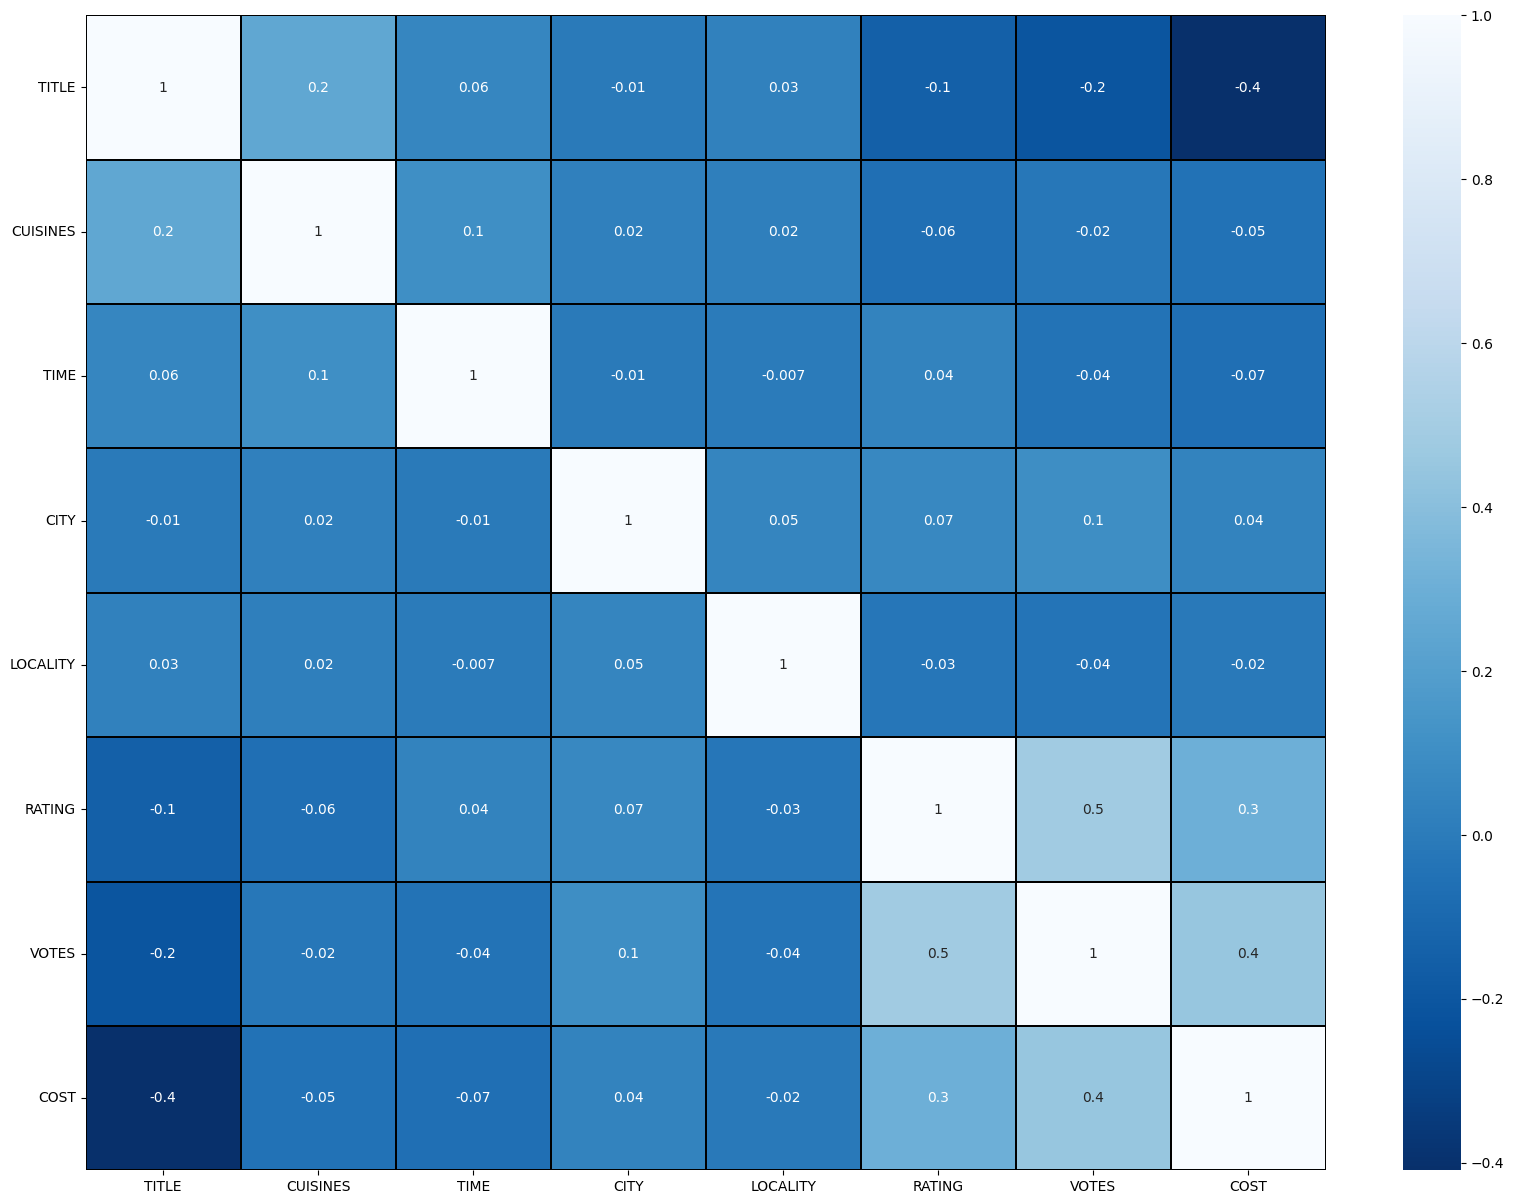

In [42]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

#### When two independent features are highly correlated, we can drop one of the columns.

In [43]:
# We can clearly see that there is no positive correlation with the target value,
# but there is a highly negative correlation with the target value.
cor['COST'].sort_values(ascending=False)

COST        1.000000
VOTES       0.449401
RATING      0.304597
CITY        0.042002
LOCALITY   -0.017715
CUISINES   -0.048165
TIME       -0.065048
TITLE      -0.409314
Name: COST, dtype: float64

In [44]:
# The titles are highly correlated.

In [45]:
# Separating feature and label
x = df.drop('COST', axis=1)
y = df['COST']

In [46]:
# Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [47]:
# Checking Variance Inflation Factor(VIF)
# Checking VIF values to confirm whether multicollinearity exists or not.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Feture Values'] = x.columns

In [48]:
vif
# So, we can clearly see that there is no multicollinearity present, so we don't need to drop any columns.

,VIF Values,Feture Values
0,1.116412,TITLE
1,1.080427,CUISINES
2,1.019934,TIME
3,1.014644,CITY
4,1.005165,LOCALITY
5,1.325467,RATING
6,1.361948,VOTES


## Modelling

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [50]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=.2, shuffle=True)

# Random Forest Regressor

In [51]:
m=RandomForestRegressor()
m.fit(x_train, y_train)

RandomForestRegressor()

In [52]:
y_pred=m.predict(x_test)
mean_squared_error(y_test,y_pred)

1.0843965194760694

In [53]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.7973586940064488


In [54]:
r2_score(y_test,y_pred)

0.6760467740278832

# Linear Regression

In [55]:
m=LinearRegression()
m.fit(x_train, y_train)
y_pred=m.predict(x_train)
mean_squared_error(y_train,y_pred)

2.295905875908802

In [56]:
y_pred=m.predict(x_test)
mean_squared_error(y_test,y_pred)

2.3395371220650523

In [57]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.1544709792377124


In [58]:
r2_score(y_test,y_pred)

0.3010853646591576

# SVR

In [59]:
from sklearn.svm import SVR
m=SVR()
m.fit(x_train, y_train)
y_pred=m.predict(x_train)
mean_squared_error(y_train,y_pred)

1.7629698455811964

In [60]:
y_pred=m.predict(x_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.025776173431353


In [61]:
r2_score(y_test,y_pred)

0.4162777615037685

# KNeighbors Regressor

In [62]:
from sklearn.neighbors import KNeighborsRegressor
m=KNeighborsRegressor()
m.fit(x_train, y_train)
y_pred=m.predict(x_train)
mean_squared_error(y_train,y_pred)

1.2768467147154907

In [63]:
y_pred=m.predict(x_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 1.0491233650853802


In [64]:
r2_score(y_test,y_pred)

0.4068462230116372

In [75]:
random_grid =  {'max_depth': [20, 60, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [20, 50, 100, 200]}

In [76]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 60, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 50, 100, 200]},
                   random_state=42, verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [68]:
best_random = rf_random.best_estimator_
y_pred=best_random.predict(x_test)
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.8282283053312804


In [69]:
r2_score(y_test,y_pred)

0.6423994407450644

In [70]:
# Predict on the test data
test_predictions = best_random.predict(test_df)

In [71]:
# Create a DataFrame for the predictions
output = final_predicted_data.copy()
output['COST'] = test_predictions

# Save the predictions to a CSV file
output.to_csv('restaurant_cost_predictions.csv', index=False)